[1] 모듈 로딩 <hr>

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import utils_temper as ut

import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')

[대구의 기온, 폭염, 습도, 미세먼지가 건강에 미치는 영향]  

대구는 여름철 폭염이 심하고 습도가 높으며, 미세먼지 농도도 자주 높아지는 지역이다. 이런 환경은 건강에 다양한 영향을 미치며, 
특히 아토피, 비염, 천식, 인플루엔자, 식중독 같은 질환을 악화시킬 수 있다.

- 급격한 기온 변화는 면역력을 떨어뜨려 인플루엔자 같은 바이러스 감염 위험을 높인다.

- 폭염과 높은 습도는 땀과 자극을 증가시켜 아토피 피부염을 악화시킨다.

- 미세먼지는 자체적으로도 호흡기 질환을 악화시키는 주요 요인 중 하나다. 기도를 자극하고 염증을 유발하며, 면역력을 약화시켜 바이러스 감염 위험을 높일 수 있다. 

- 더운 날씨와 높은 습도는 식중독균이 빠르게 번식할 수 있는 환경을 조성해 식중독 발생 가능성도 커진다.

기온 <hr>

In [301]:
D_FILT="./DATA/Daegutemper(06_24).xlsx"
daegu_temper=pd.read_excel(D_FILT)

In [302]:
## 년도별 평균기온 데이터 추출
daegu_temper_group=daegu_temper[["년","평균기온(℃)"]]
daegu_temper = daegu_temper_group[daegu_temper_group['년'] <= 2023]

daegu_temper

,년,평균기온(℃)
0,2006,14.6
1,2007,15.0
2,2008,14.6
3,2009,14.8
4,2010,14.4
5,2011,14.3
6,2012,14.1
7,2013,15.0
8,2014,14.9
9,2015,14.8


폭염 <hr>

In [303]:
D1_FILE='./DATA/daegu_hot(06-24).csv'
daegu_hot=pd.read_csv(D1_FILE)
daegu_hot.head()

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연합계,순위
0,2006,0,0,0,0,0,2,6,19,0,0,0,0,27,13
1,2007,0,0,0,0,0,1,5,16,1,0,0,0,23,15
2,2008,0,0,0,0,1,1,20,13,1,0,0,0,36,6
3,2009,0,0,0,0,2,6,1,7,2,0,0,0,18,19
4,2010,0,0,0,0,0,4,12,20,5,0,0,0,41,4


In [304]:
# 년도별 폭염 지수(연합계) 데이터 추출
daegu_hot_group=daegu_hot[['연도', '연합계']]
daegu_hot = daegu_hot_group[daegu_hot_group['연도'] <= 2023]
# 연도를 년으로 변경 <= 컬럼명 통합 예정
daegu_hot = daegu_hot.rename(columns={'연도': '년'})

daegu_hot

,년,연합계
0,2006,27
1,2007,23
2,2008,36
3,2009,18
4,2010,41
5,2011,29
6,2012,30
7,2013,54
8,2014,22
9,2015,21


습도 <hr>

In [305]:
## 파일 읽어와서 저장 하기 
D2_FILE='./DATA/daegu_rain_hum(06-22).csv'
daegu_rain_hum=pd.read_csv(D2_FILE)

In [306]:
# [3]번의 데이터에서 년도와 습도를 추출해줌 
daegu_hum=daegu_rain_hum[['년도', '평균상대습도(%)']]
daegu_hum = daegu_hum.rename(columns={'년도': '년'})
daegu_hum

,년,평균상대습도(%)
0,2006,58
1,2007,58
2,2008,57
3,2009,54
4,2010,56
5,2011,55
6,2012,56
7,2013,56
8,2014,65
9,2015,66


대구 미세먼지 데이터 로딩 <hr>

In [307]:
PM = pd.read_csv('./DATA/미세먼지(PM10)_월별_도시별_대기오염도(10.01_24.06).csv', encoding="EUC-KR")
PM = PM.loc[1:1]
print(PM.columns)
print(PM.dtypes)
PM

Index(['구분', '항목', '단위', '2010.01 월', '2010.02 월', '2010.03 월', '2010.04 월',
       '2010.05 월', '2010.06 월', '2010.07 월',
       ...
       '2023.10 월', '2023.11 월', '2023.12 월', '2024.01 월', '2024.02 월',
       '2024.03 월', '2024.04 월', '2024.05 월', '2024.06 월', 'Unnamed: 177'],
      dtype='object', length=178)
구분               object
항목               object
단위              float64
2010.01 월       float64
2010.02 월        object
                 ...   
2024.03 월        object
2024.04 월        object
2024.05 월        object
2024.06 월        object
Unnamed: 177    float64
Length: 178, dtype: object


,구분,항목,단위,2010.01 월,2010.02 월,2010.03 월,2010.04 월,2010.05 월,2010.06 월,2010.07 월,...,2023.10 월,2023.11 월,2023.12 월,2024.01 월,2024.02 월,2024.03 월,2024.04 월,2024.05 월,2024.06 월,Unnamed: 177
1,대구광역시,월평균,NaN,56.0,49,69.0,47,55,47,36,...,27,30,37,34,26,41,53,29,27,NaN


In [308]:
PM = PM.drop(['항목','단위','Unnamed: 177','구분'],axis=1)
PM

,2010.01 월,2010.02 월,2010.03 월,2010.04 월,2010.05 월,2010.06 월,2010.07 월,2010.08 월,2010.09 월,2010.10 월,...,2023.09 월,2023.10 월,2023.11 월,2023.12 월,2024.01 월,2024.02 월,2024.03 월,2024.04 월,2024.05 월,2024.06 월
1,56.0,49,69.0,47,55,47,36,38,36,43.0,...,18,27,30,37,34,26,41,53,29,27


In [309]:
# 미세먼지 데이터 확인
PM.values

array([[56.0, '49', 69.0, '47', '55', '47', '36', '38', '36', 43.0, 70.0,
        67.0, '41', 65.0, 58.0, 51.0, 66.0, '46', '35', '32', '32', 44.0,
        47.0, 43.0, 51.0, '49', 48.0, 50.0, '49', '37', '34', '27', 31.0,
        '43', '48', '43', 65.0, 50.0, 60.0, '45', '52', 44.0, '32', '39',
        31.0, '35', '42', '48', '60', '50', '50', 53.0, 60.0, '42', 38.0,
        27.0, 33.0, '36', '49', '44', 54.0, 66.0, '61', '42', '48', 47.0,
        '34', '37', '30', '43', '34', '51', '49', '45', '52', '60', '48',
        '39', '29', '28', '33', '35', '52*', '47', '49', '41', 48.0,
        50.0, '53', '38', '34', '24', '36*', '32*', '52', '46', '47',
        '48', '43', '56', '40', '36', '27', '22', '24', '32', '57', '47',
        '57', '54', 54.0, '40', 46.0, '32', '26', '26', 23.0, '27', '41',
        '42', '37', '38', '38', '39', '38', '35', '22', '25', '25', '33',
        '40', '38', '40', '41', '59', '42', '41', '35', '19', '21', '18',
        '26', '40', '38', '37', 35.0, '42', '36

In [310]:
# 52* 없애기
PM = PM.map(lambda x: x.replace('*', '') if isinstance(x, str) else x)
PM = PM.astype(int)

PM.values

array([[56, 49, 69, 47, 55, 47, 36, 38, 36, 43, 70, 67, 41, 65, 58, 51,
        66, 46, 35, 32, 32, 44, 47, 43, 51, 49, 48, 50, 49, 37, 34, 27,
        31, 43, 48, 43, 65, 50, 60, 45, 52, 44, 32, 39, 31, 35, 42, 48,
        60, 50, 50, 53, 60, 42, 38, 27, 33, 36, 49, 44, 54, 66, 61, 42,
        48, 47, 34, 37, 30, 43, 34, 51, 49, 45, 52, 60, 48, 39, 29, 28,
        33, 35, 52, 47, 49, 41, 48, 50, 53, 38, 34, 24, 36, 32, 52, 46,
        47, 48, 43, 56, 40, 36, 27, 22, 24, 32, 57, 47, 57, 54, 54, 40,
        46, 32, 26, 26, 23, 27, 41, 42, 37, 38, 38, 39, 38, 35, 22, 25,
        25, 33, 40, 38, 40, 41, 59, 42, 41, 35, 19, 21, 18, 26, 40, 38,
        37, 35, 42, 36, 33, 22, 20, 18, 20, 24, 41, 35, 42, 42, 62, 67,
        34, 25, 24, 18, 18, 27, 30, 37, 34, 26, 41, 53, 29, 27]])

In [311]:
# 컬럼명 변경과 행렬 변경
PM = PM.T
PM = PM.reset_index()
PM.columns = ['년', '미세먼지']

PM

,년,미세먼지
0,2010.01 월,56
1,2010.02 월,49
2,2010.03 월,69
3,2010.04 월,47
4,2010.05 월,55
...,...,...
169,2024.02 월,26
170,2024.03 월,41
171,2024.04 월,53
172,2024.05 월,29


In [312]:
# 미세먼지 데이터 06 ~ 23 으로 변경
PM = PM[~PM['년'].str.startswith('2024')]

PM

,년,미세먼지
0,2010.01 월,56
1,2010.02 월,49
2,2010.03 월,69
3,2010.04 월,47
4,2010.05 월,55
...,...,...
163,2023.08 월,18
164,2023.09 월,18
165,2023.10 월,27
166,2023.11 월,30


In [313]:
# 연도 추출 후 연도별 평균 계산
PM = PM.copy()
PM['년'] = PM['년'].str[:4]
PM_yearly = PM.groupby('년')['미세먼지'].mean().reset_index()

print("연도별 미세먼지 평균:")
print(PM_yearly)

연도별 미세먼지 평균:
       년       미세먼지
0   2010  51.083333
1   2011  46.666667
2   2012  42.500000
3   2013  45.250000
4   2014  45.166667
5   2015  45.583333
6   2016  43.083333
7   2017  41.916667
8   2018  39.916667
9   2019  39.000000
10  2020  34.000000
11  2021  35.000000
12  2022  30.250000
13  2023  35.500000


미세먼지 데이터 그래프 그리기 <hr>

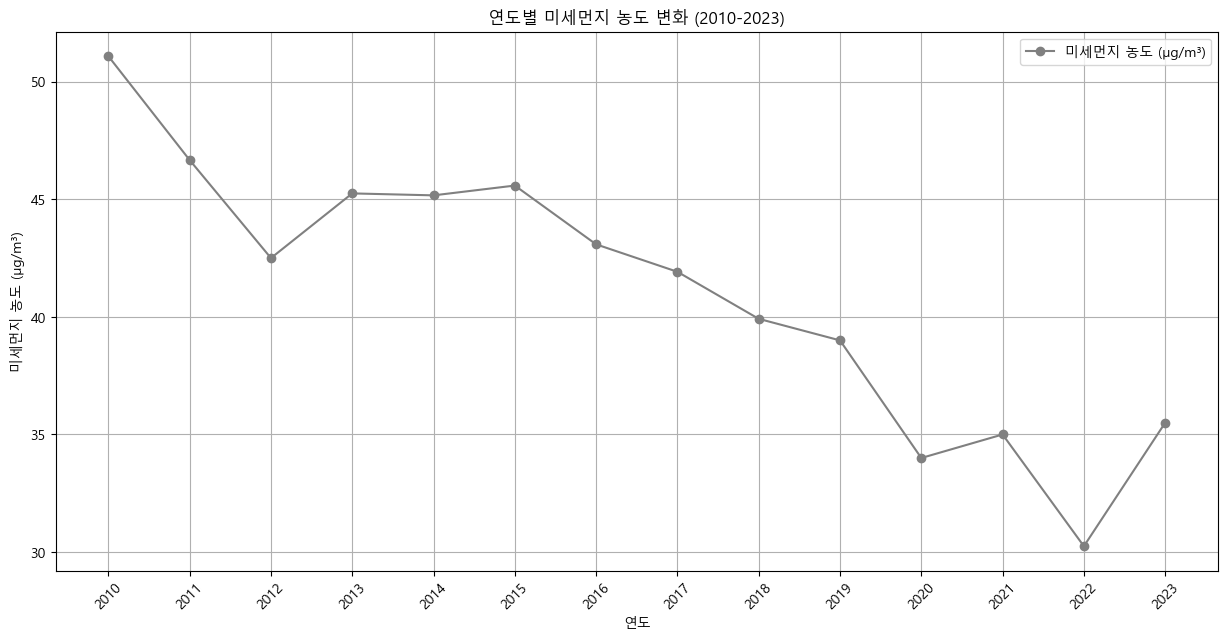

In [314]:
# 함수 사용
ut.plot_yearly(PM_yearly, 
                "미세먼지 농도", 
                "미세먼지 농도 (μg/m³)",'gray')

환경성 질환 <hr>

- 아토피

In [315]:
ATP = pd.read_excel('./DATA/국민건강보험공단_환경성질환(아토피) 의료이용정보_20231231.xlsx')
ATP = ATP[ATP['주소(시군구)'].astype(str).str[:2] == '27']
ATP.head()

,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
492,2006-01,27110,남자,1. 0-5세,51
493,2006-01,27110,남자,2. 6-11세,23
494,2006-01,27110,남자,3. 12-17세,10
495,2006-01,27110,남자,4. 18-44세,30
496,2006-01,27110,남자,5. 45-64세,11


In [316]:
# 연도별 아토피 평균 계산
ATP_yearly = ATP.groupby(ATP['요양개시연월'].str[:4])['진료에피소드 건수'].mean().reset_index()

ATP_yearly

,요양개시연월,진료에피소드 건수
0,2006,69.062205
1,2007,62.731726
2,2008,64.676744
3,2009,64.314757
4,2010,65.159717
5,2011,64.553797
6,2012,61.085039
7,2013,63.785995
8,2014,61.644984
9,2015,59.335433


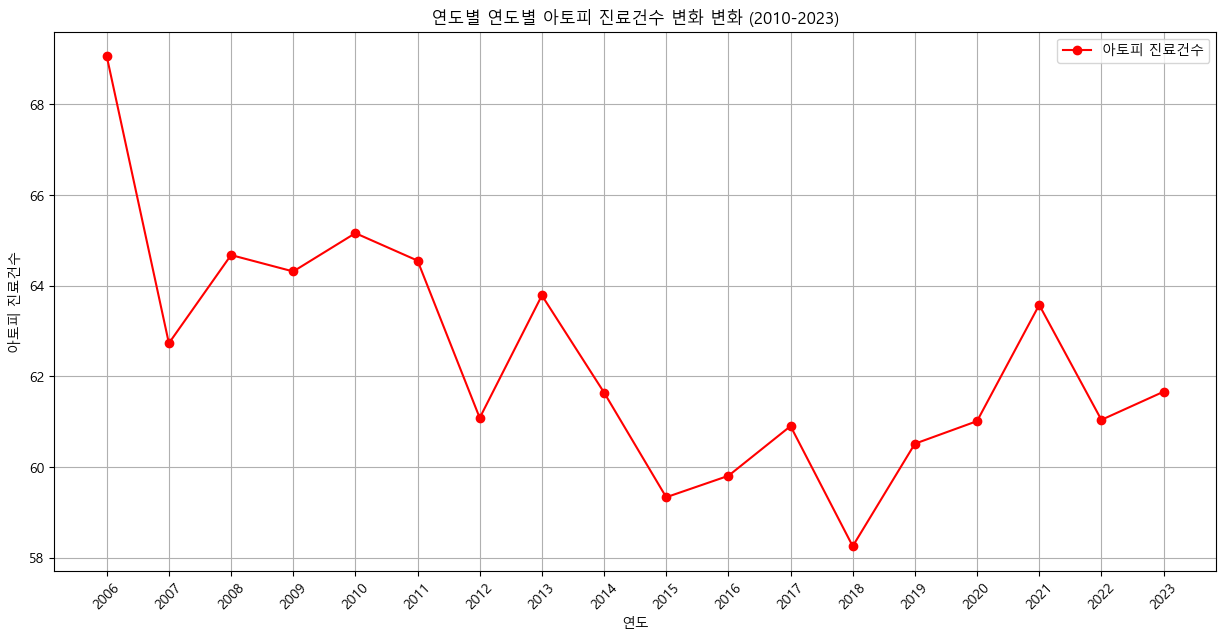

In [317]:
# 그래프 그리기
ut.plot_yearly(ATP_yearly, 
                "연도별 아토피 진료건수 변화", 
                "아토피 진료건수", 'r')

아토피와의 상관계수 계산 <hr>

In [318]:
# 상관계수 계산
correlation = ut.corr_data(daegu_temper, ATP_yearly)
print(f"\n평균기온과 아토피 진료건수의 상관계수: {correlation:.3f}")
correlation = ut.corr_data(daegu_hot, ATP_yearly)
print(f"\n폭염과 아토피 진료건수의 상관계수: {correlation:.3f}")
correlation = ut.corr_data(daegu_hum, ATP_yearly)
print(f"\n습도와 아토피 진료건수의 상관계수: {correlation:.3f}")
correlation = ut.corr_data(PM, ATP_yearly)
print(f"\n미세먼지와 아토피 진료건수의 상관계수: {correlation:.3f}")


평균기온과 아토피 진료건수의 상관계수: 0.102

폭염과 아토피 진료건수의 상관계수: -0.033

습도와 아토피 진료건수의 상관계수: -0.497

미세먼지와 아토피 진료건수의 상관계수: 0.042


예상과 달리 습도가 증가할 때 아토피 진료건수는 감소하는 경향이 있음

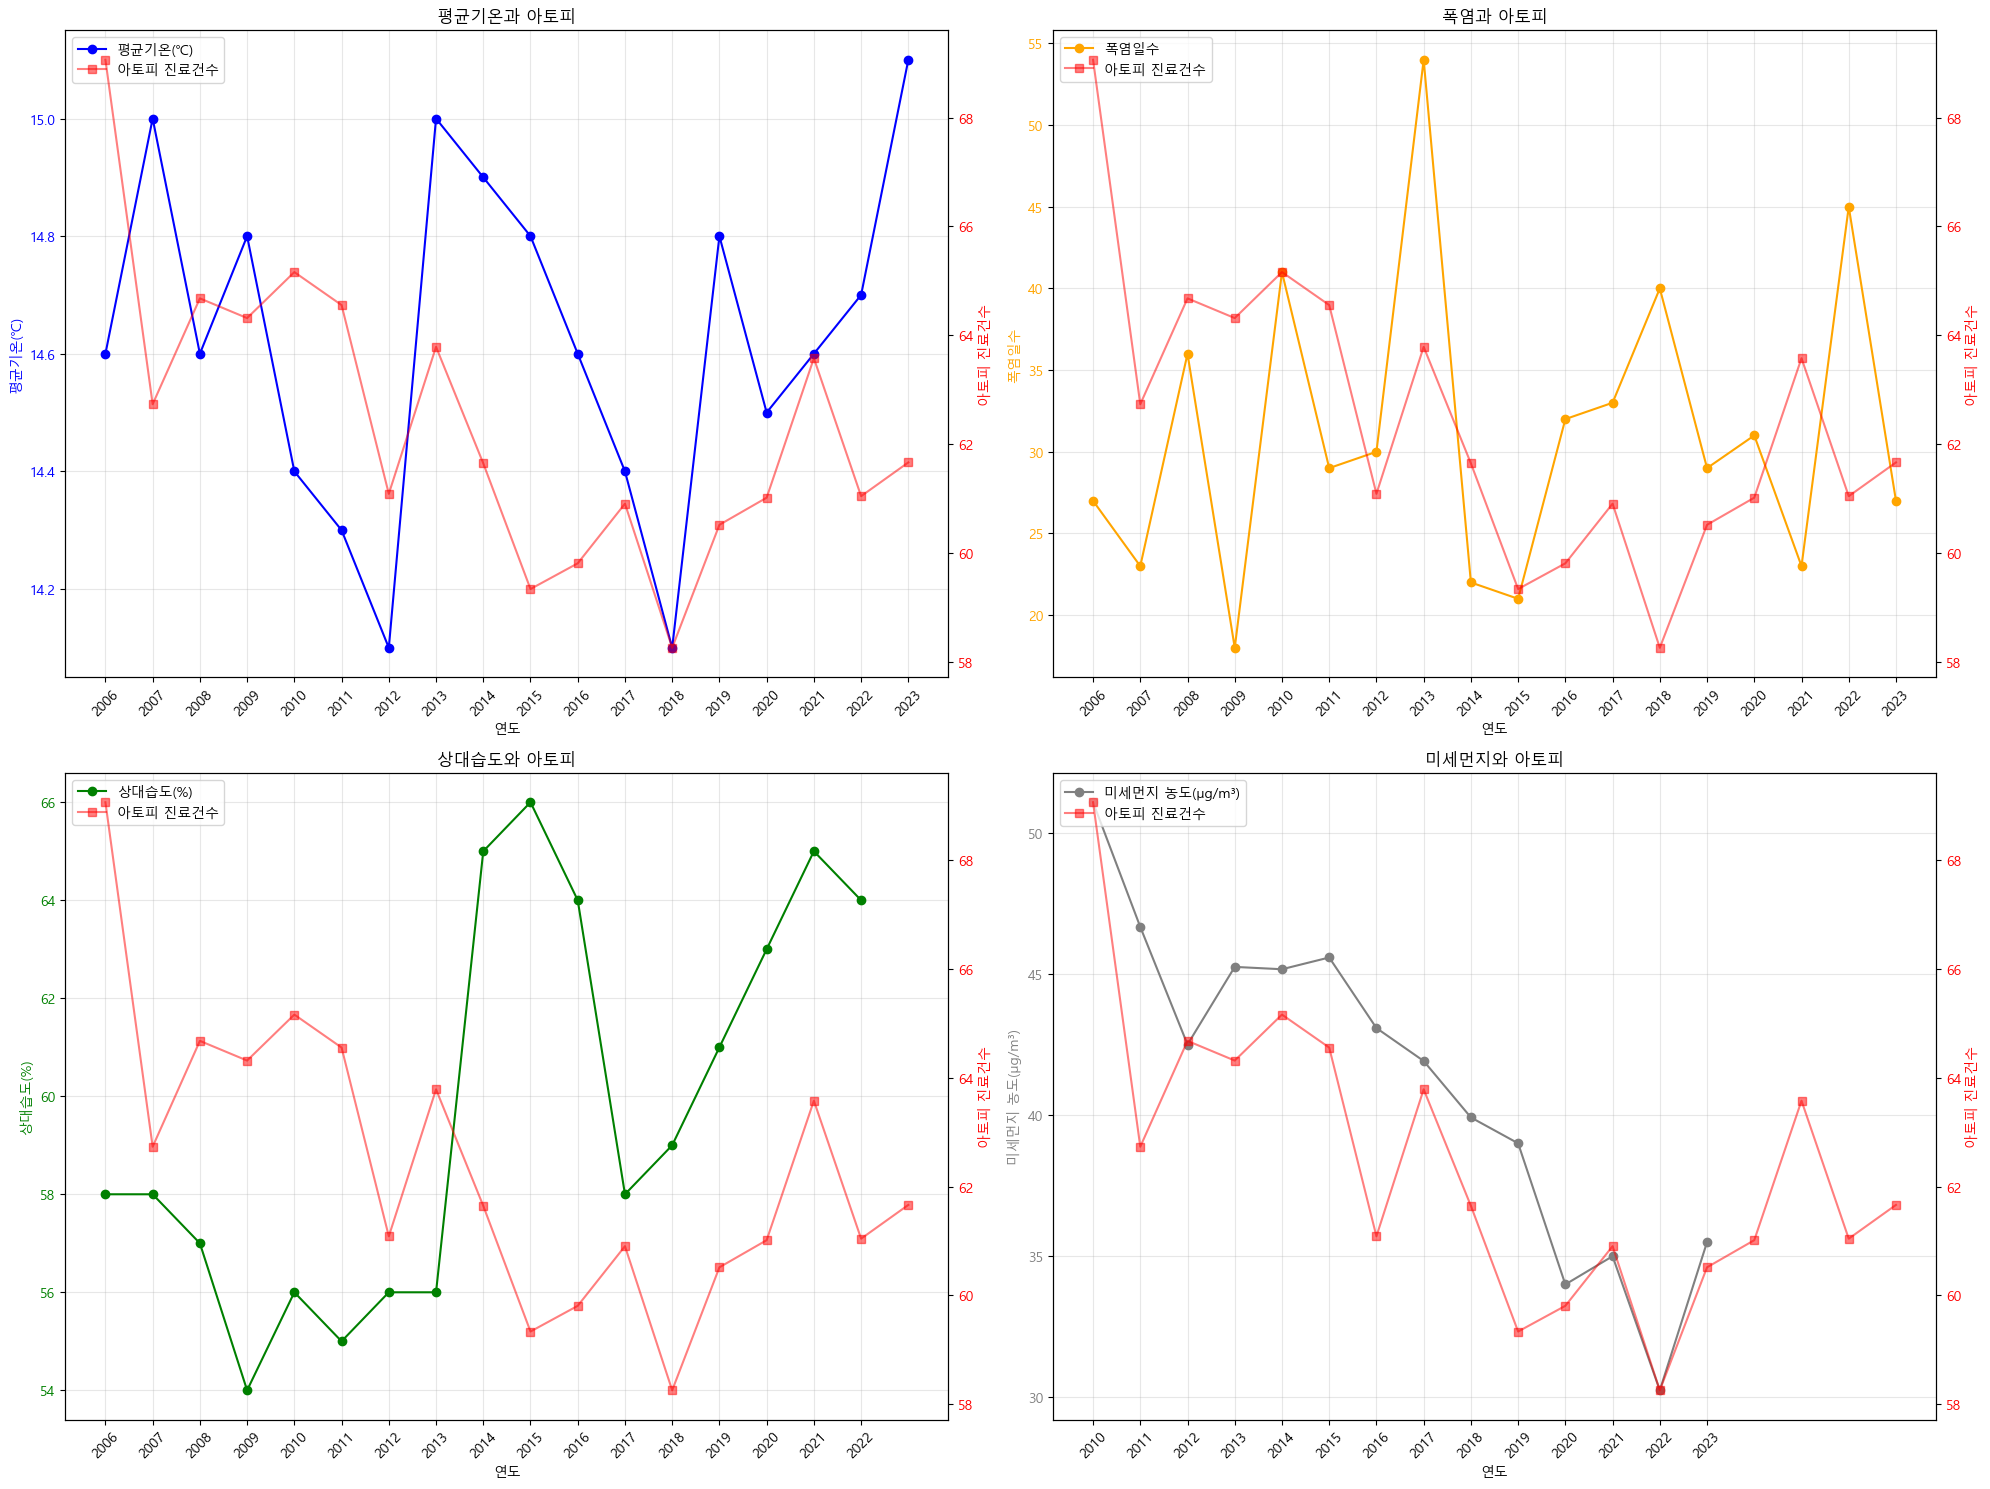

In [319]:
# 비염과의 관계
ut.plot_quad_with_disease(
    [daegu_temper, daegu_hot, daegu_hum, PM_yearly],  # 환경 데이터 리스트
    ATP_yearly,  # 질병 데이터
    ["평균기온과 아토피", "폭염과 아토피", 
     "상대습도와 아토피", "미세먼지와 아토피"],  # 제목 리스트
    ["평균기온(℃)", "폭염일수", 
     "상대습도(%)", "미세먼지 농도(μg/m³)"],  # 환경 데이터 레이블
    "아토피 진료건수",  # 질병 데이터 레이블
    ['blue', 'orange', 'green', 'gray']  # 색상 리스트
)

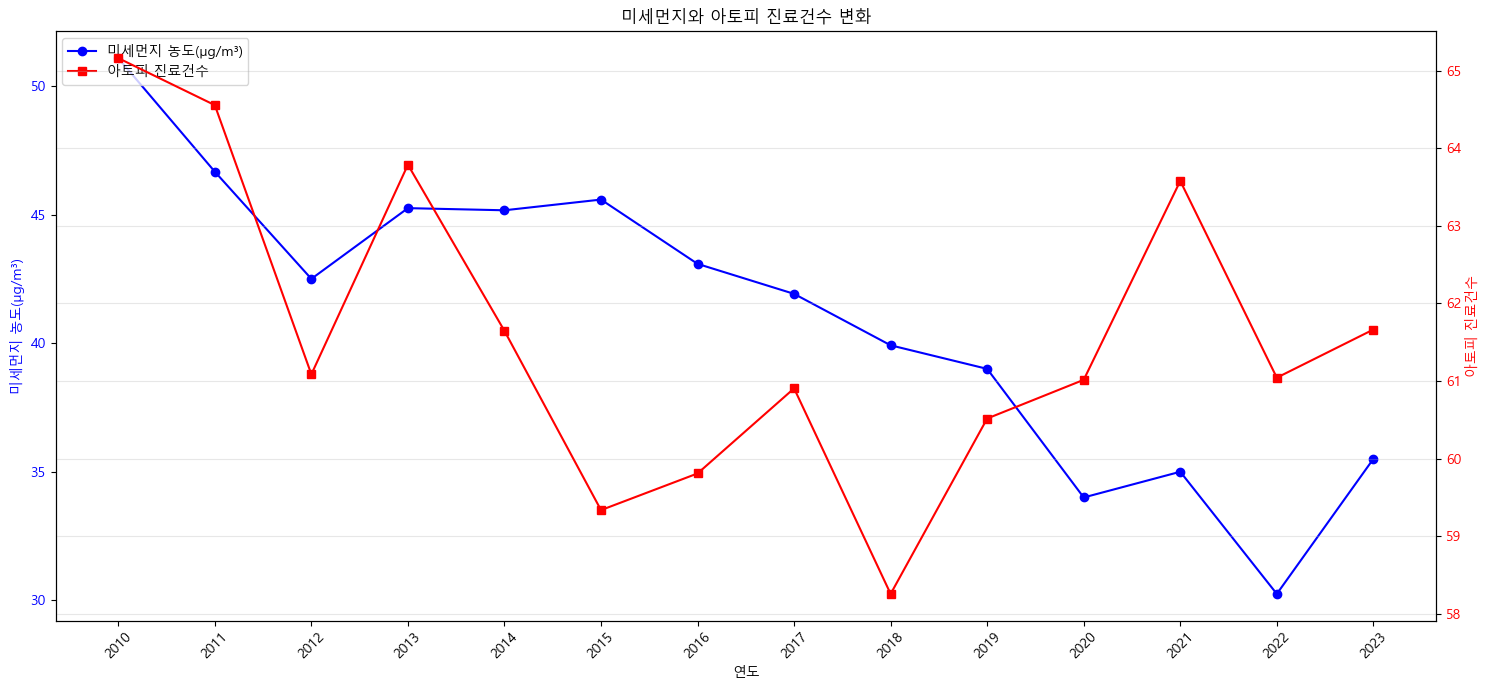

In [320]:
ATP_yearly10 = ATP_yearly[ATP_yearly['요양개시연월'].astype(int) >= 2010].copy() 

ut.plot_dual_data(
    PM_yearly,  # 미세먼지 데이터 (년, 평균기온)
    ATP_yearly10,    # 아토피 데이터 (년, 진료건수)
    "미세먼지와 아토피 진료건수 변화",
    "미세먼지 농도(μg/m³)",
    "아토피 진료건수"
)

2010년부터 2015년까지 미세먼지와 아토피 진료건수가 비슷한 패턴으로 움직이는 것이 보입니다
특히 2011-2014년 구간에서는 두 선이 매우 유사한 추세를 보임

- 비염

In [321]:
AR = pd.read_excel('./DATA/국민건강보험공단_환경성질환(비염) 의료이용정보_20231231.xlsx')
AR = AR[AR['주소(시군구)'].astype(str).str[:2] == '27']
AR.head()

,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
492,2006-01,27110,남자,1. 0-5세,118
493,2006-01,27110,남자,2. 6-11세,120
494,2006-01,27110,남자,3. 12-17세,85
495,2006-01,27110,남자,4. 18-44세,322
496,2006-01,27110,남자,5. 45-64세,238


In [322]:
# 연도별 비염 평균 계산
AR_yearly = AR.groupby(AR['요양개시연월'].str[:4])['진료에피소드 건수'].mean().reset_index()

AR_yearly

,요양개시연월,진료에피소드 건수
0,2006,619.483025
1,2007,623.871142
2,2008,725.634259
3,2009,810.064815
4,2010,868.838735
5,2011,881.794753
6,2012,914.162809
7,2013,921.506944
8,2014,996.775463
9,2015,953.459877


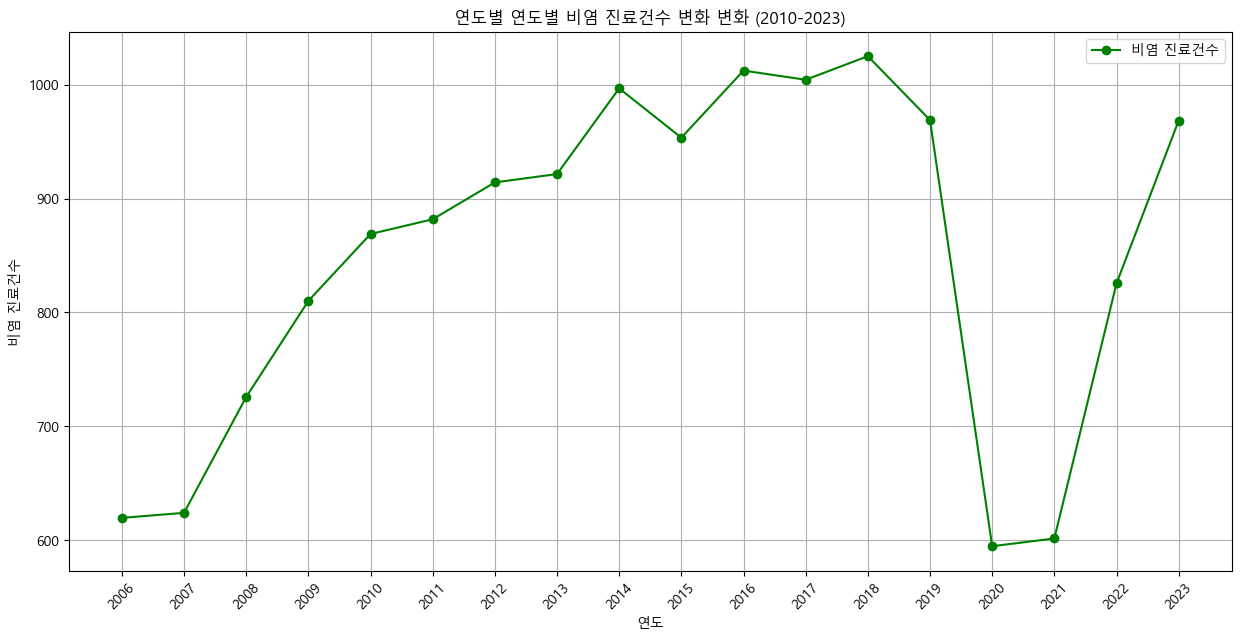

In [323]:
# 그래프 그리기
ut.plot_yearly(AR_yearly, 
            "연도별 비염 진료건수 변화", 
            "비염 진료건수", 'g')

In [324]:
correlation = ut.corr_data(daegu_temper, AR_yearly)
print(f"\n평균기온과 비염 진료건수의 상관계수: {correlation:.3f}")
correlation = ut.corr_data(daegu_hot, AR_yearly)
print(f"\n폭염과 비염 진료건수의 상관계수: {correlation:.3f}")
correlation = ut.corr_data(daegu_hum, AR_yearly)
print(f"\n습도와 비염 진료건수의 상관계수: {correlation:.3f}")
correlation = ut.corr_data(PM, AR_yearly)
print(f"\n미세먼지와 비염 진료건수의 상관계수: {correlation:.3f}")


평균기온과 비염 진료건수의 상관계수: -0.083

폭염과 비염 진료건수의 상관계수: 0.205

습도와 비염 진료건수의 상관계수: 0.025

미세먼지와 비염 진료건수의 상관계수: -0.167


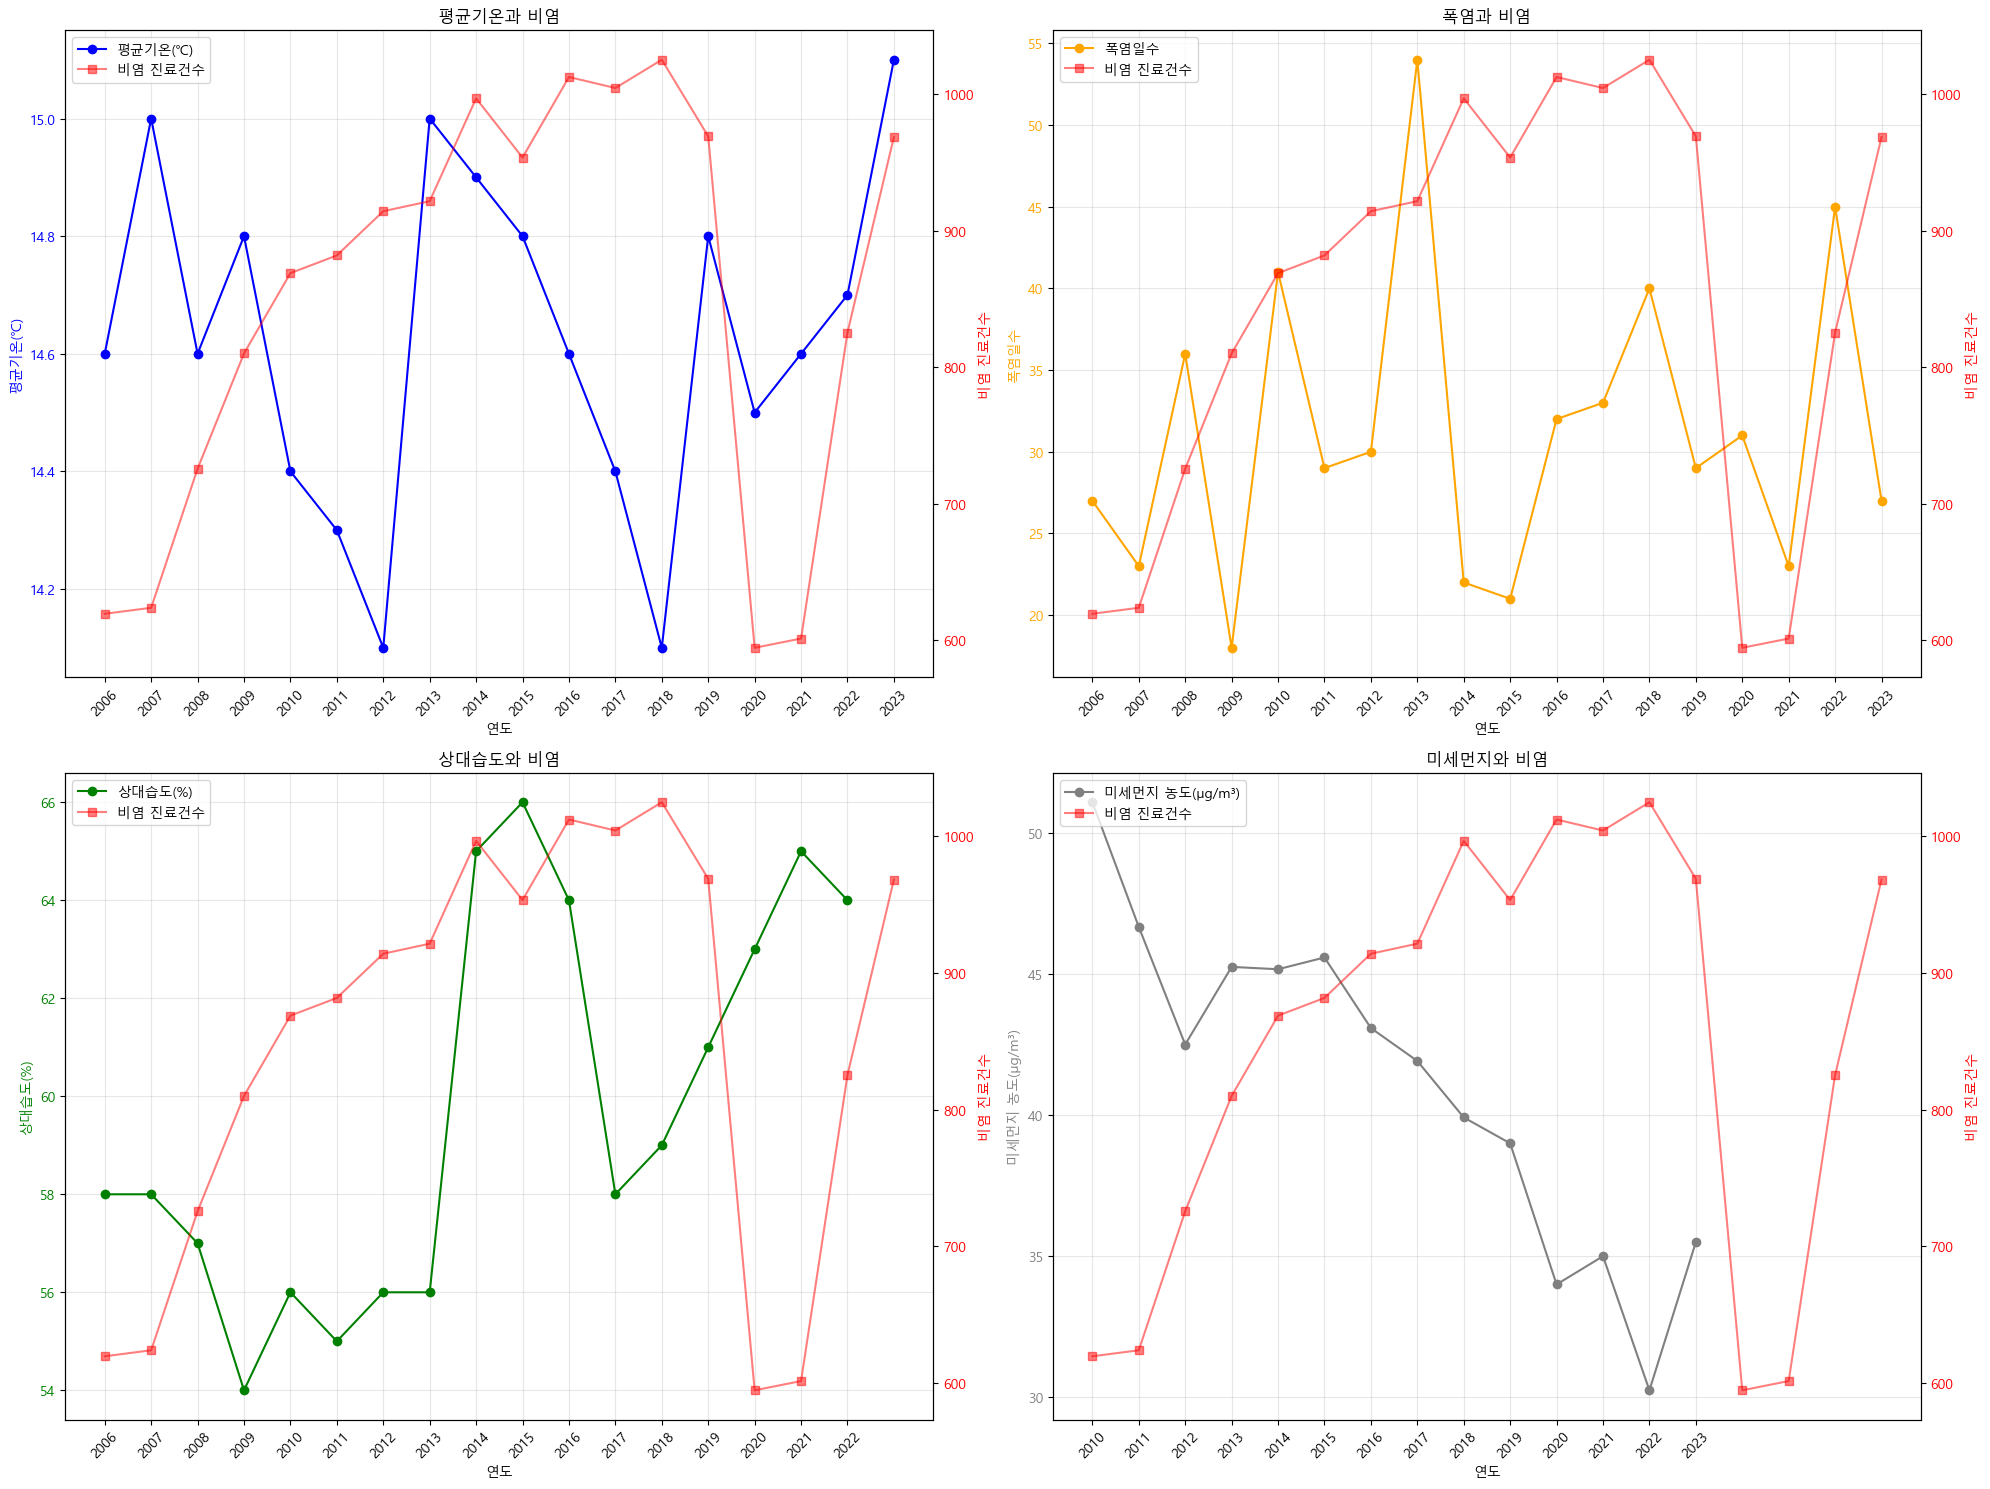

In [325]:
# 비염과의 관계
ut.plot_quad_with_disease(
    [daegu_temper, daegu_hot, daegu_hum, PM_yearly],  # 환경 데이터 리스트
    AR_yearly,  # 질병 데이터
    ["평균기온과 비염", "폭염과 비염", 
     "상대습도와 비염", "미세먼지와 비염"],  # 제목 리스트
    ["평균기온(℃)", "폭염일수", 
     "상대습도(%)", "미세먼지 농도(μg/m³)"],  # 환경 데이터 레이블
    "비염 진료건수",  # 질병 데이터 레이블
    ['blue', 'orange', 'green', 'gray']  # 색상 리스트
)

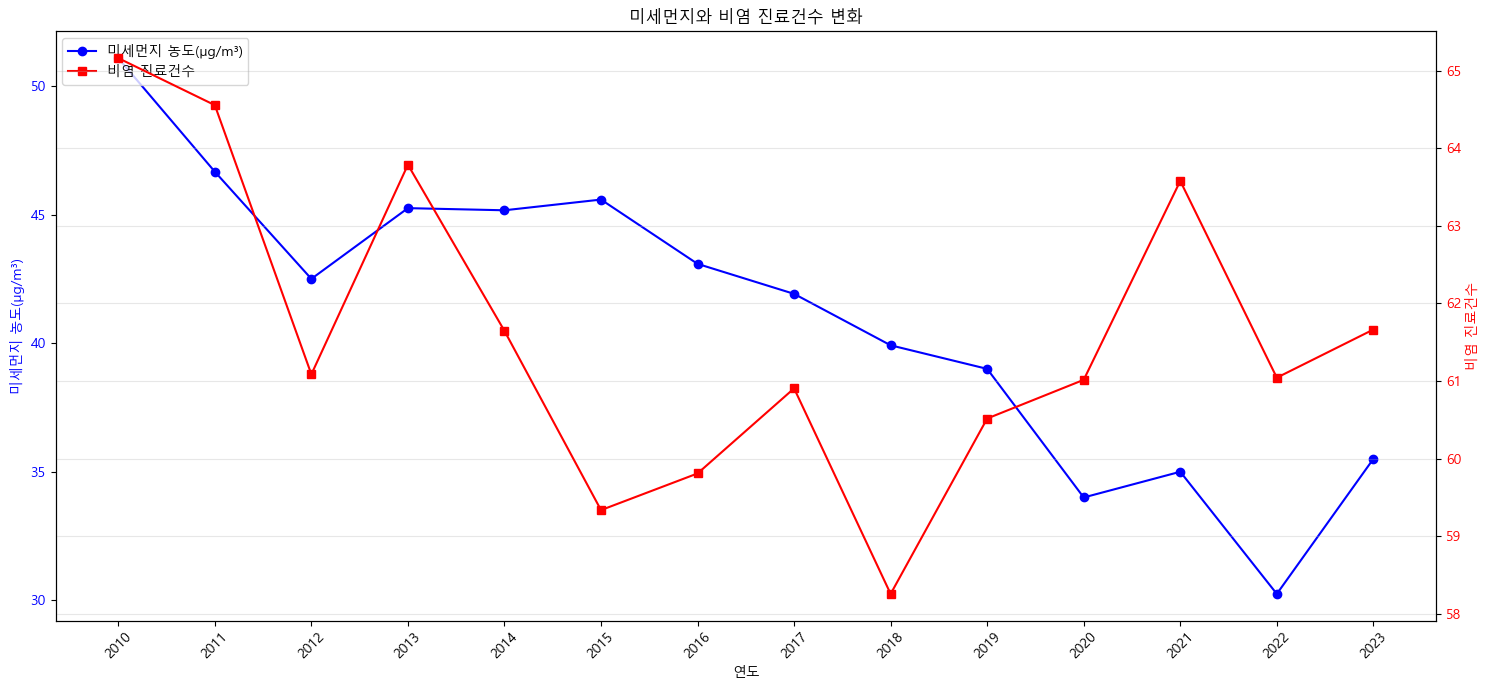

In [326]:
AR_yearly10 = AR_yearly[AR_yearly['요양개시연월'].astype(int) >= 2010].copy() 

ut.plot_dual_data(
    PM_yearly,  # 미세먼지 데이터 (년, 평균기온)
    ATP_yearly10,    # 아토피 데이터 (년, 진료건수)
    "미세먼지와 비염 진료건수 변화",
    "미세먼지 농도(μg/m³)",
    "비염 진료건수"
)

- 천식

In [327]:
AST = pd.read_excel('./DATA/국민건강보험공단_환경성질환(천식) 의료이용정보_20231231.xlsx')
AST.head()

,요양개시연월,주소(시군구),성별,연령군,진료에피소드 건수
0,2006-01,11110,남자,1. 0-5세,203
1,2006-01,11110,남자,2. 6-11세,114
2,2006-01,11110,남자,3. 12-17세,21
3,2006-01,11110,남자,4. 18-44세,91
4,2006-01,11110,남자,5. 45-64세,127


In [328]:
# 연도별 천식 평균 계산
AST_yearly = AST.groupby(AST['요양개시연월'].str[:4])['진료에피소드 건수'].mean().reset_index()

AST_yearly

,요양개시연월,진료에피소드 건수
0,2006,120.986851
1,2007,112.522541
2,2008,114.856054
3,2009,117.924248
4,2010,120.530811
5,2011,121.223428
6,2012,121.695576
7,2013,113.160131
8,2014,113.858589
9,2015,107.192258


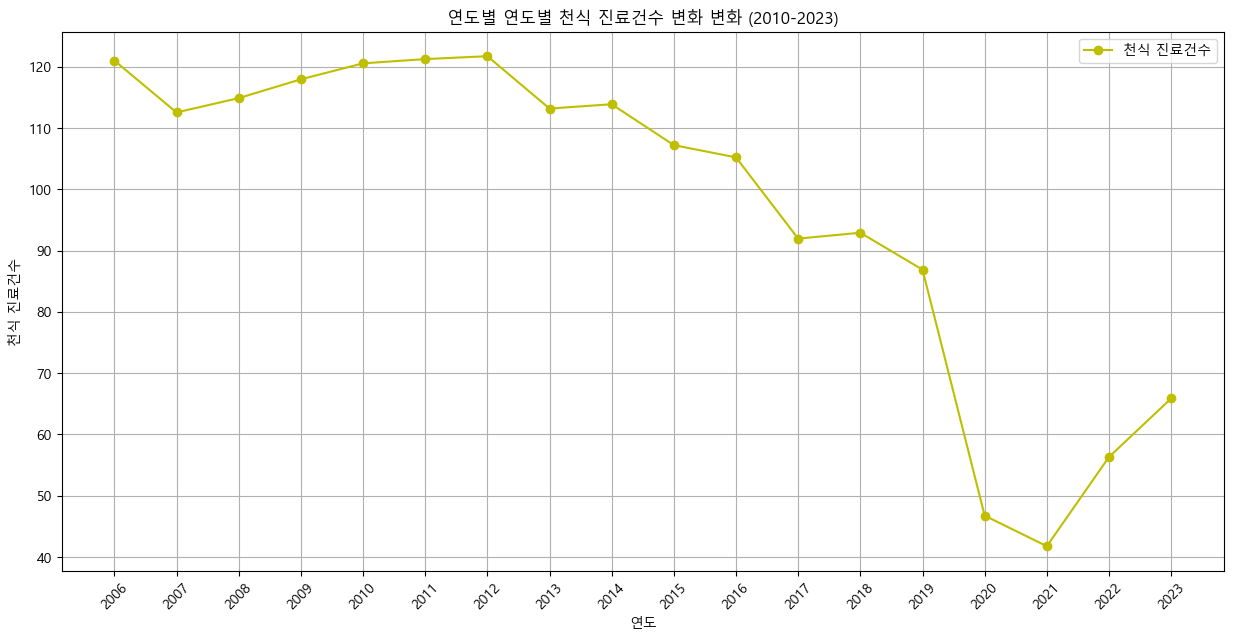

In [329]:
# 그래프 그리기
ut.plot_yearly(AST_yearly, 
            "연도별 천식 진료건수 변화", 
            "천식 진료건수", 'y')

In [330]:
correlation = ut.corr_data(daegu_temper, AST_yearly)
print(f"\n평균기온과 천식 진료건수의 상관계수: {correlation:.3f}")
correlation = ut.corr_data(daegu_hot, AST_yearly)
print(f"\n폭염과 천식 진료건수의 상관계수: {correlation:.3f}")
correlation = ut.corr_data(daegu_hum, AST_yearly)
print(f"\n습도와 천식 진료건수의 상관계수: {correlation:.3f}")
correlation = ut.corr_data(PM, AST_yearly)
print(f"\n미세먼지와 천식 진료건수의 상관계수: {correlation:.3f}")


평균기온과 천식 진료건수의 상관계수: -0.105

폭염과 천식 진료건수의 상관계수: -0.034

습도와 천식 진료건수의 상관계수: -0.605

미세먼지와 천식 진료건수의 상관계수: -0.270


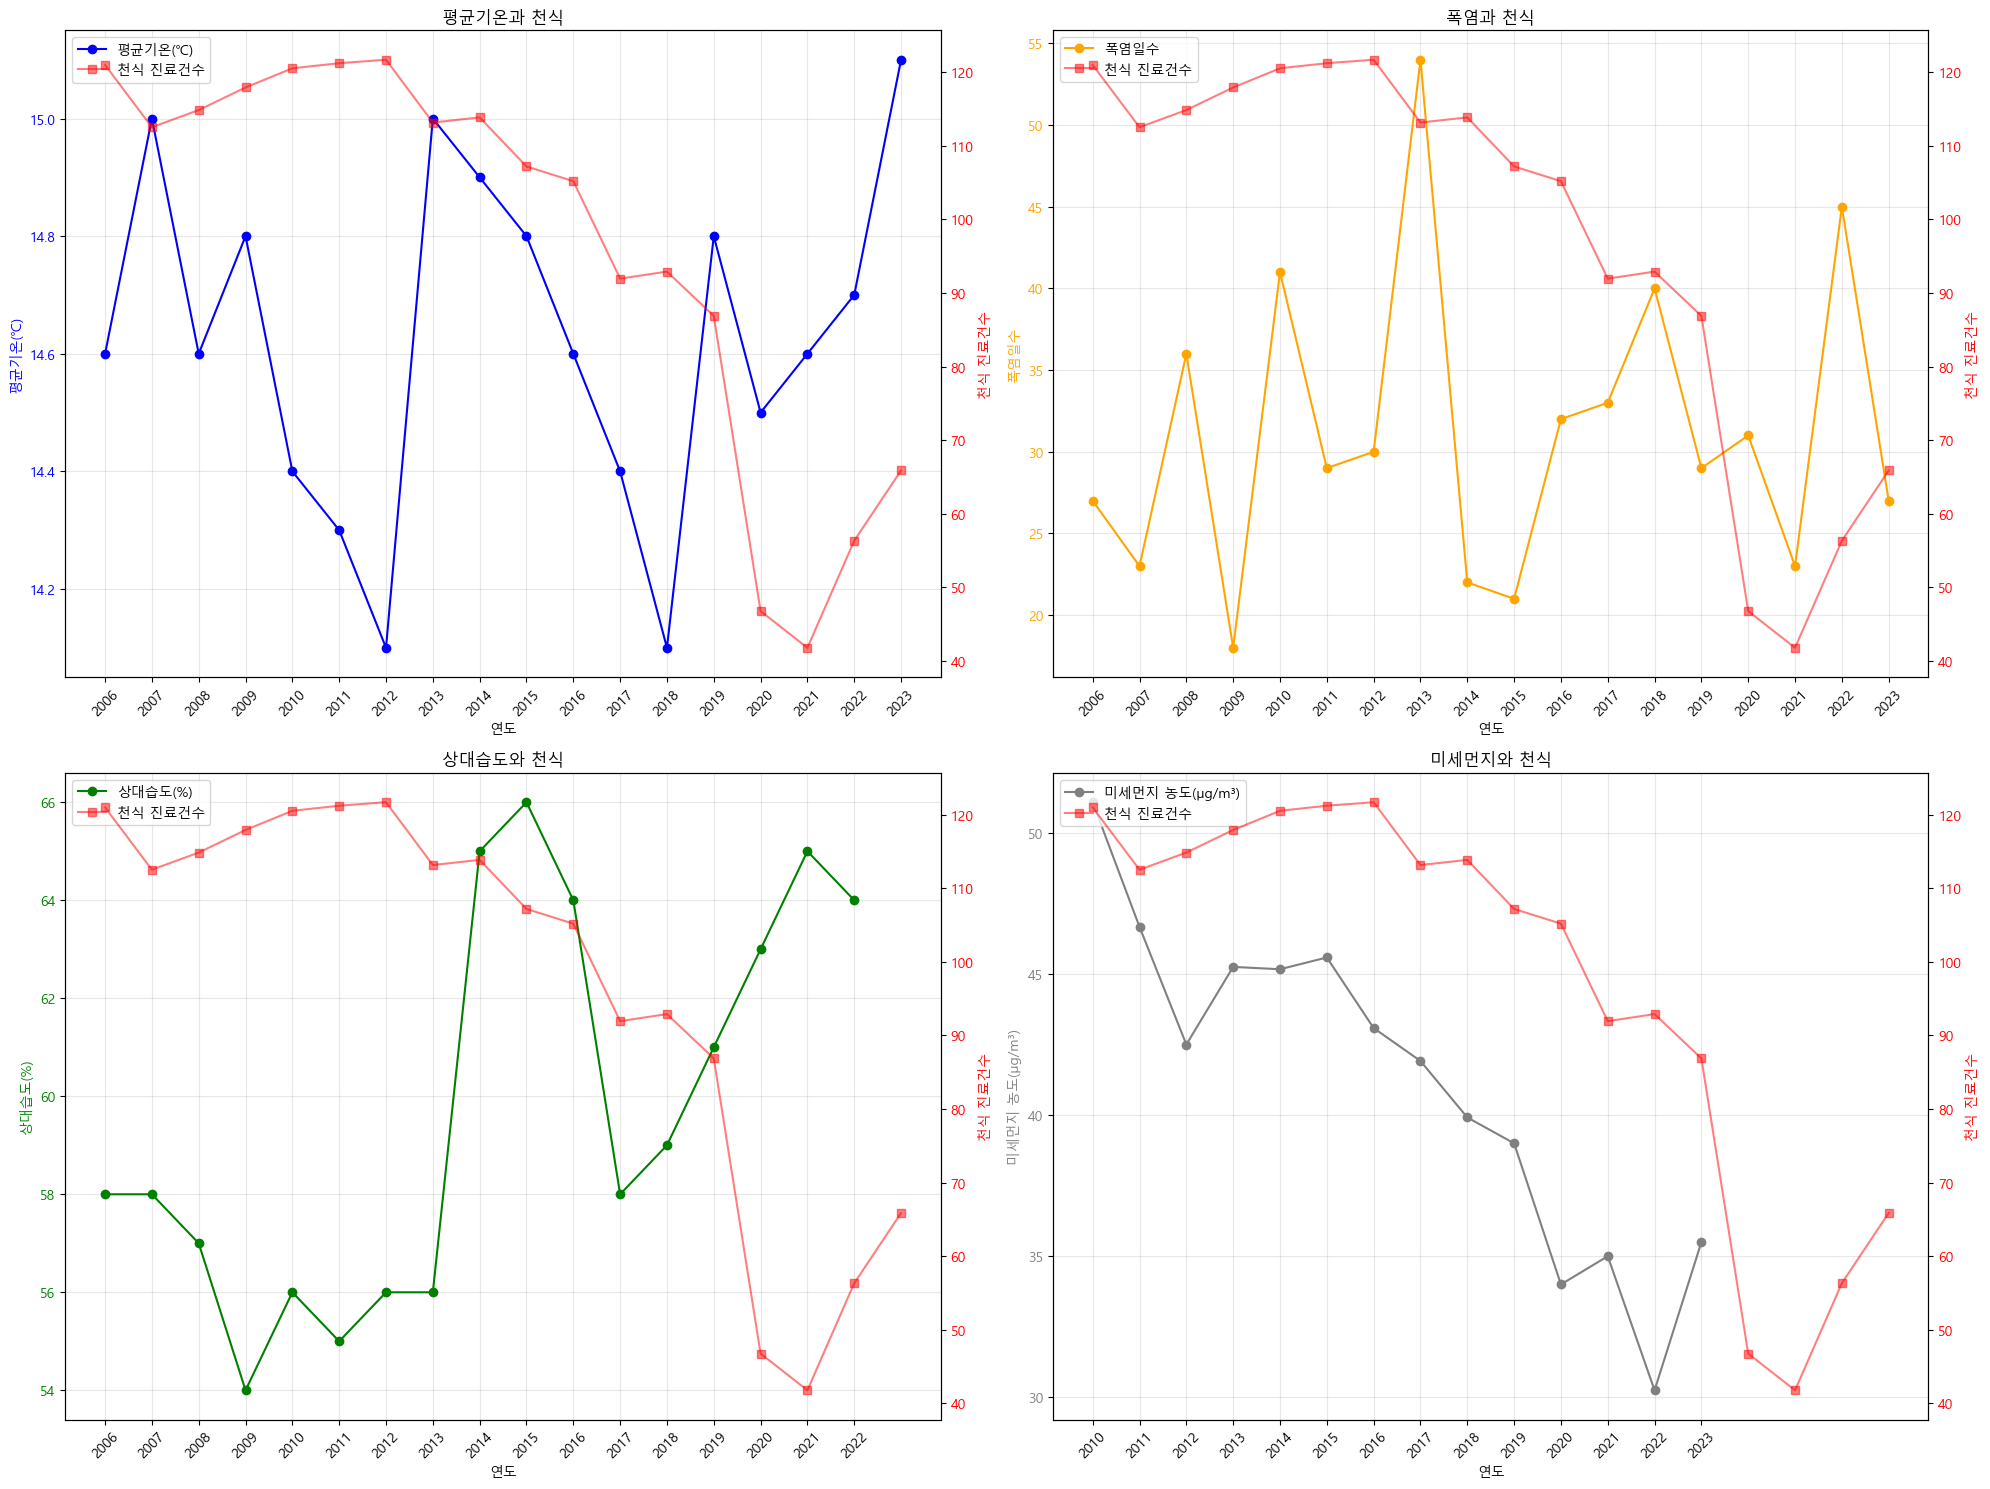

In [331]:
# 천식과의 관계
ut.plot_quad_with_disease(
    [daegu_temper, daegu_hot, daegu_hum, PM_yearly],  # 환경 데이터 리스트
    AST_yearly,  # 질병 데이터
    ["평균기온과 천식", "폭염과 천식", 
     "상대습도와 천식", "미세먼지와 천식"],  # 제목 리스트
    ["평균기온(℃)", "폭염일수", 
     "상대습도(%)", "미세먼지 농도(μg/m³)"],  # 환경 데이터 레이블
    "천식 진료건수",  # 질병 데이터 레이블
    ['blue', 'orange', 'green', 'gray']  # 색상 리스트
)

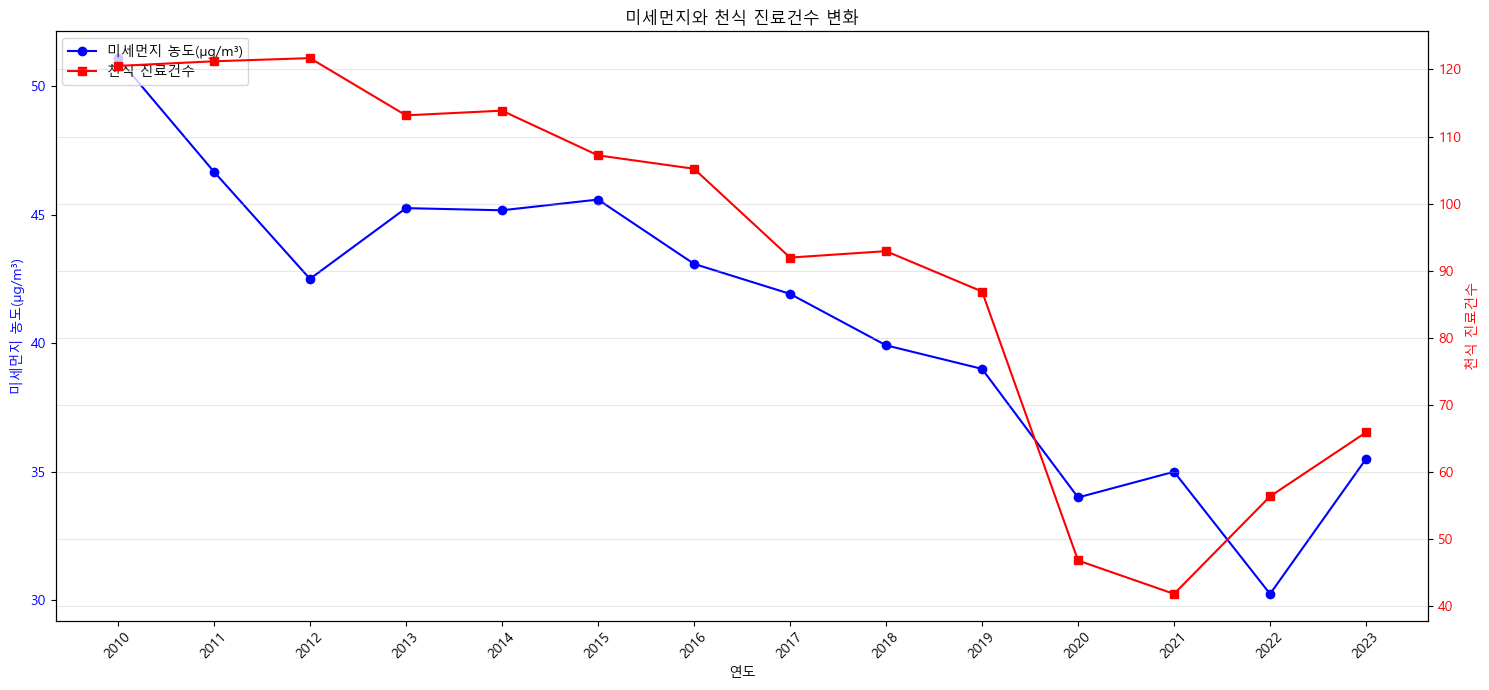

In [332]:
AST_yearly10 = AST_yearly[AST_yearly['요양개시연월'].astype(int) >= 2010].copy() 

ut.plot_dual_data(
    PM_yearly,  # 미세먼지 데이터 (년, 평균기온)
    AST_yearly10,    # 천식 데이터 (년, 진료건수)
    "미세먼지와 천식 진료건수 변화",
    "미세먼지 농도(μg/m³)",
    "천식 진료건수"
)

In [333]:
# # 2010년 이후 데이터만 사용하여 상관계수 계산
# correlation = ut.corr_data(PM_yearly, AST_yearly10)
# print(f"\n2010년 이후 미세먼지와 천식 진료건수의 상관계수: {correlation:.3f}")

- 감염성질환(인플루엔자)

In [334]:
Flu = pd.read_excel('./DATA/국민건강보험공단_감염성질환(인플루엔자) 의료이용정보_20231231.xlsx')
Flu = Flu[Flu['주소(시도)'].astype(str) == '27']
Flu.head()

,요양개시일자,주소(시도),성별,연령군,진료에피소드 건수
18,2006-01-01,27,남자,1. 0-5세,1
19,2006-01-01,27,여자,1. 0-5세,1
20,2006-01-01,27,여자,6. 65세이상,2
134,2006-01-02,27,남자,1. 0-5세,4
135,2006-01-02,27,남자,2. 6-11세,2


In [335]:
Flu_yearly = Flu.groupby(Flu['요양개시일자'].str[:4])['진료에피소드 건수'].mean().reset_index()

Flu_yearly

,요양개시일자,진료에피소드 건수
0,2006,4.592006
1,2007,6.011374
2,2008,6.272586
3,2009,45.398582
4,2010,8.090617
5,2011,4.437931
6,2012,12.328917
7,2013,5.212136
8,2014,21.401394
9,2015,19.653912


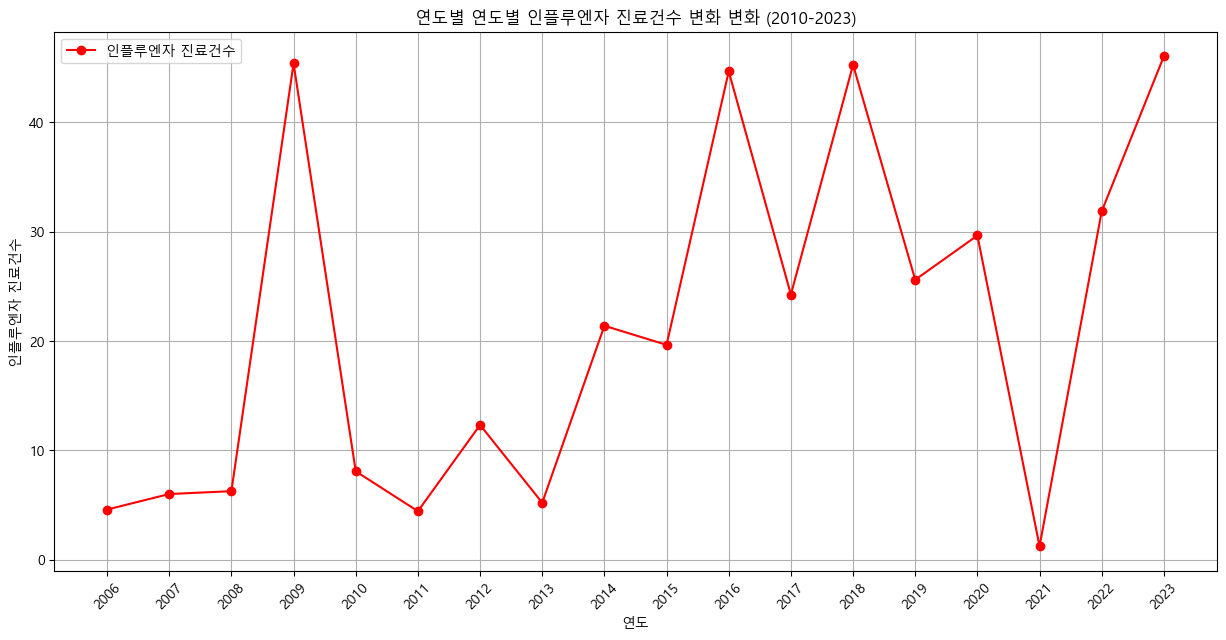

In [336]:
# 그래프 그리기
ut.plot_yearly(Flu_yearly, 
                "연도별 인플루엔자 진료건수 변화", 
                "인플루엔자 진료건수", 'r')

In [337]:
# 상관계수 계산
correlation = ut.corr_data(daegu_temper, Flu_yearly)
print(f"\n평균기온과 인플루엔자 진료건수의 상관계수: {correlation:.3f}")
correlation = ut.corr_data(daegu_hot, Flu_yearly)
print(f"\n폭염과 인플루엔자 진료건수의 상관계수: {correlation:.3f}")
correlation = ut.corr_data(daegu_hum, Flu_yearly)  
print(f"\n습도와 인플루엔자 진료건수의 상관계수: {correlation:.3f}")
correlation = ut.corr_data(PM, Flu_yearly)
print(f"\n미세먼지와 인플루엔자 진료건수의 상관계수: {correlation:.3f}")


평균기온과 인플루엔자 진료건수의 상관계수: 0.063

폭염과 인플루엔자 진료건수의 상관계수: -0.077

습도와 인플루엔자 진료건수의 상관계수: 0.222

미세먼지와 인플루엔자 진료건수의 상관계수: 0.112


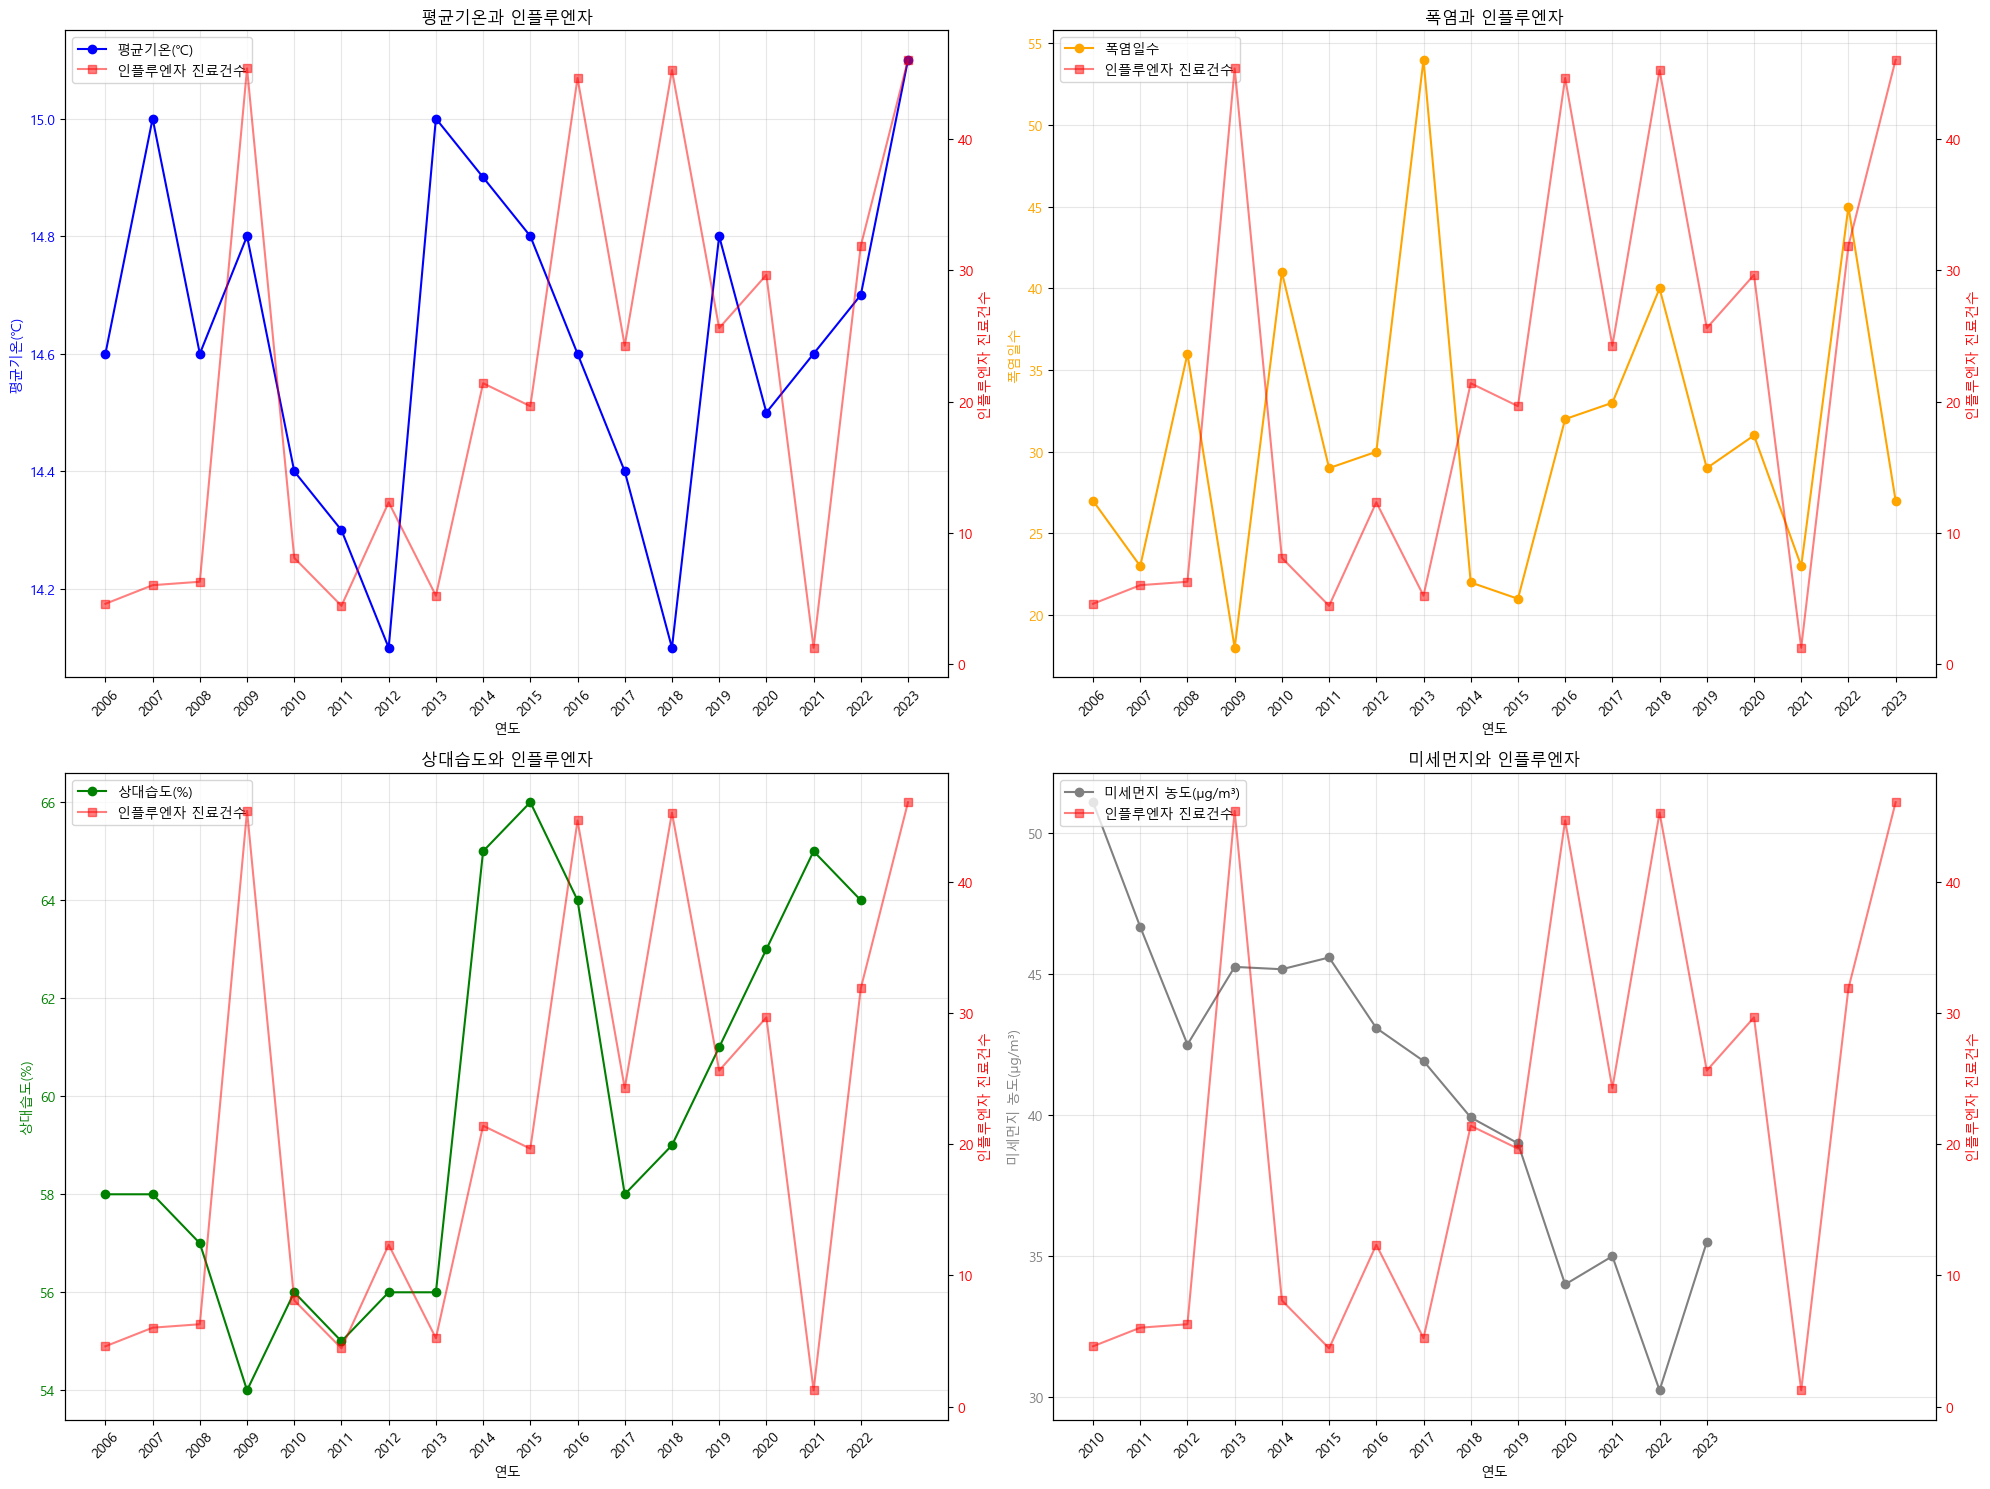

In [338]:
# 인플루엔자와의 관계
ut.plot_quad_with_disease(
    [daegu_temper, daegu_hot, daegu_hum, PM_yearly],  # 환경 데이터 리스트
    Flu_yearly,  # 질병 데이터
    ["평균기온과 인플루엔자", "폭염과 인플루엔자", 
     "상대습도와 인플루엔자", "미세먼지와 인플루엔자"],  # 제목 리스트
    ["평균기온(℃)", "폭염일수", 
     "상대습도(%)", "미세먼지 농도(μg/m³)"],  # 환경 데이터 레이블
    "인플루엔자 진료건수",  # 질병 데이터 레이블
    ['blue', 'orange', 'green', 'gray']  # 색상 리스트
)

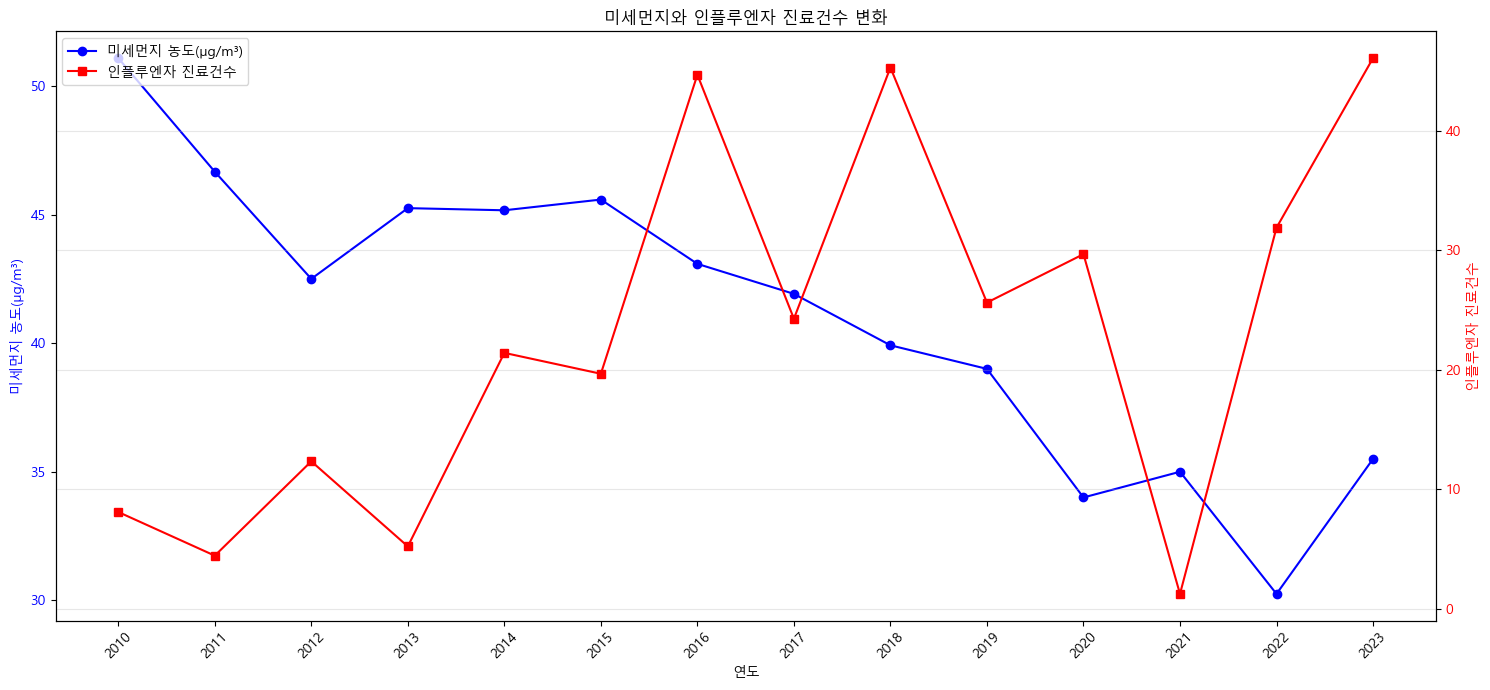

In [339]:
Flu_yearly10 = Flu_yearly[Flu_yearly['요양개시일자'].astype(int) >= 2010].copy() 

ut.plot_dual_data(
    PM_yearly,  # 미세먼지 데이터 (년, 평균기온)
    Flu_yearly10,    # 인플루엔자 데이터 (년, 진료건수)
    "미세먼지와 인플루엔자 진료건수 변화",
    "미세먼지 농도(μg/m³)",
    "인플루엔자 진료건수"
)

- 식중독

In [340]:
Food_Poisoning = pd.read_excel('./DATA/지역별_연도별_식중독_통계_.xlsx')
Food_Poisoning = Food_Poisoning.T
Food_Poisoning = Food_Poisoning.reset_index()
Food_Poisoning.columns = ['년', '식중독']
Food_Poisoning
Food_Poisoning = Food_Poisoning.drop(0)
Food_Poisoning


,년,식중독
1,2006년,700
2,2007년,490
3,2008년,439
4,2009년,241
5,2010년,188
6,2011년,230
7,2012년,238
8,2013년,121
9,2014년,155
10,2015년,149


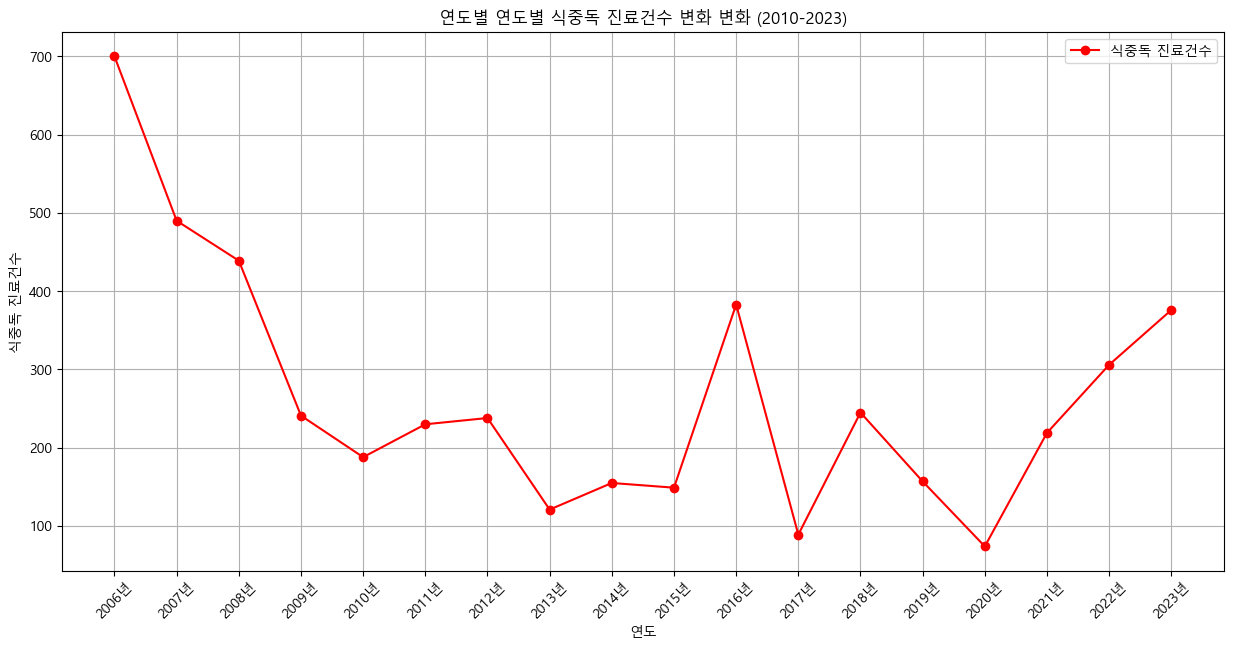

In [341]:
# 그래프 그리기
ut.plot_yearly(Food_Poisoning, 
                "연도별 식중독 진료건수 변화", 
                "식중독 진료건수", 'r')


In [342]:
correlation = ut.corr_data(daegu_temper, Food_Poisoning)
print(f"\n평균기온과 식중독 진료건수의 상관계수: {correlation:.3f}")
correlation = ut.corr_data(daegu_hot, Food_Poisoning)
print(f"\n폭염과 식중독 진료건수의 상관계수: {correlation:.3f}")
correlation = ut.corr_data(daegu_hum, Food_Poisoning)
print(f"\n습도와 식중독 진료건수의 상관계수: {correlation:.3f}")
correlation = ut.corr_data(PM, Food_Poisoning)
print(f"\n미세먼지와 식중독 진료건수의 상관계수: {correlation:.3f}")


평균기온과 식중독 진료건수의 상관계수: 0.342

폭염과 식중독 진료건수의 상관계수: -0.145

습도와 식중독 진료건수의 상관계수: -0.510

미세먼지와 식중독 진료건수의 상관계수: 0.131


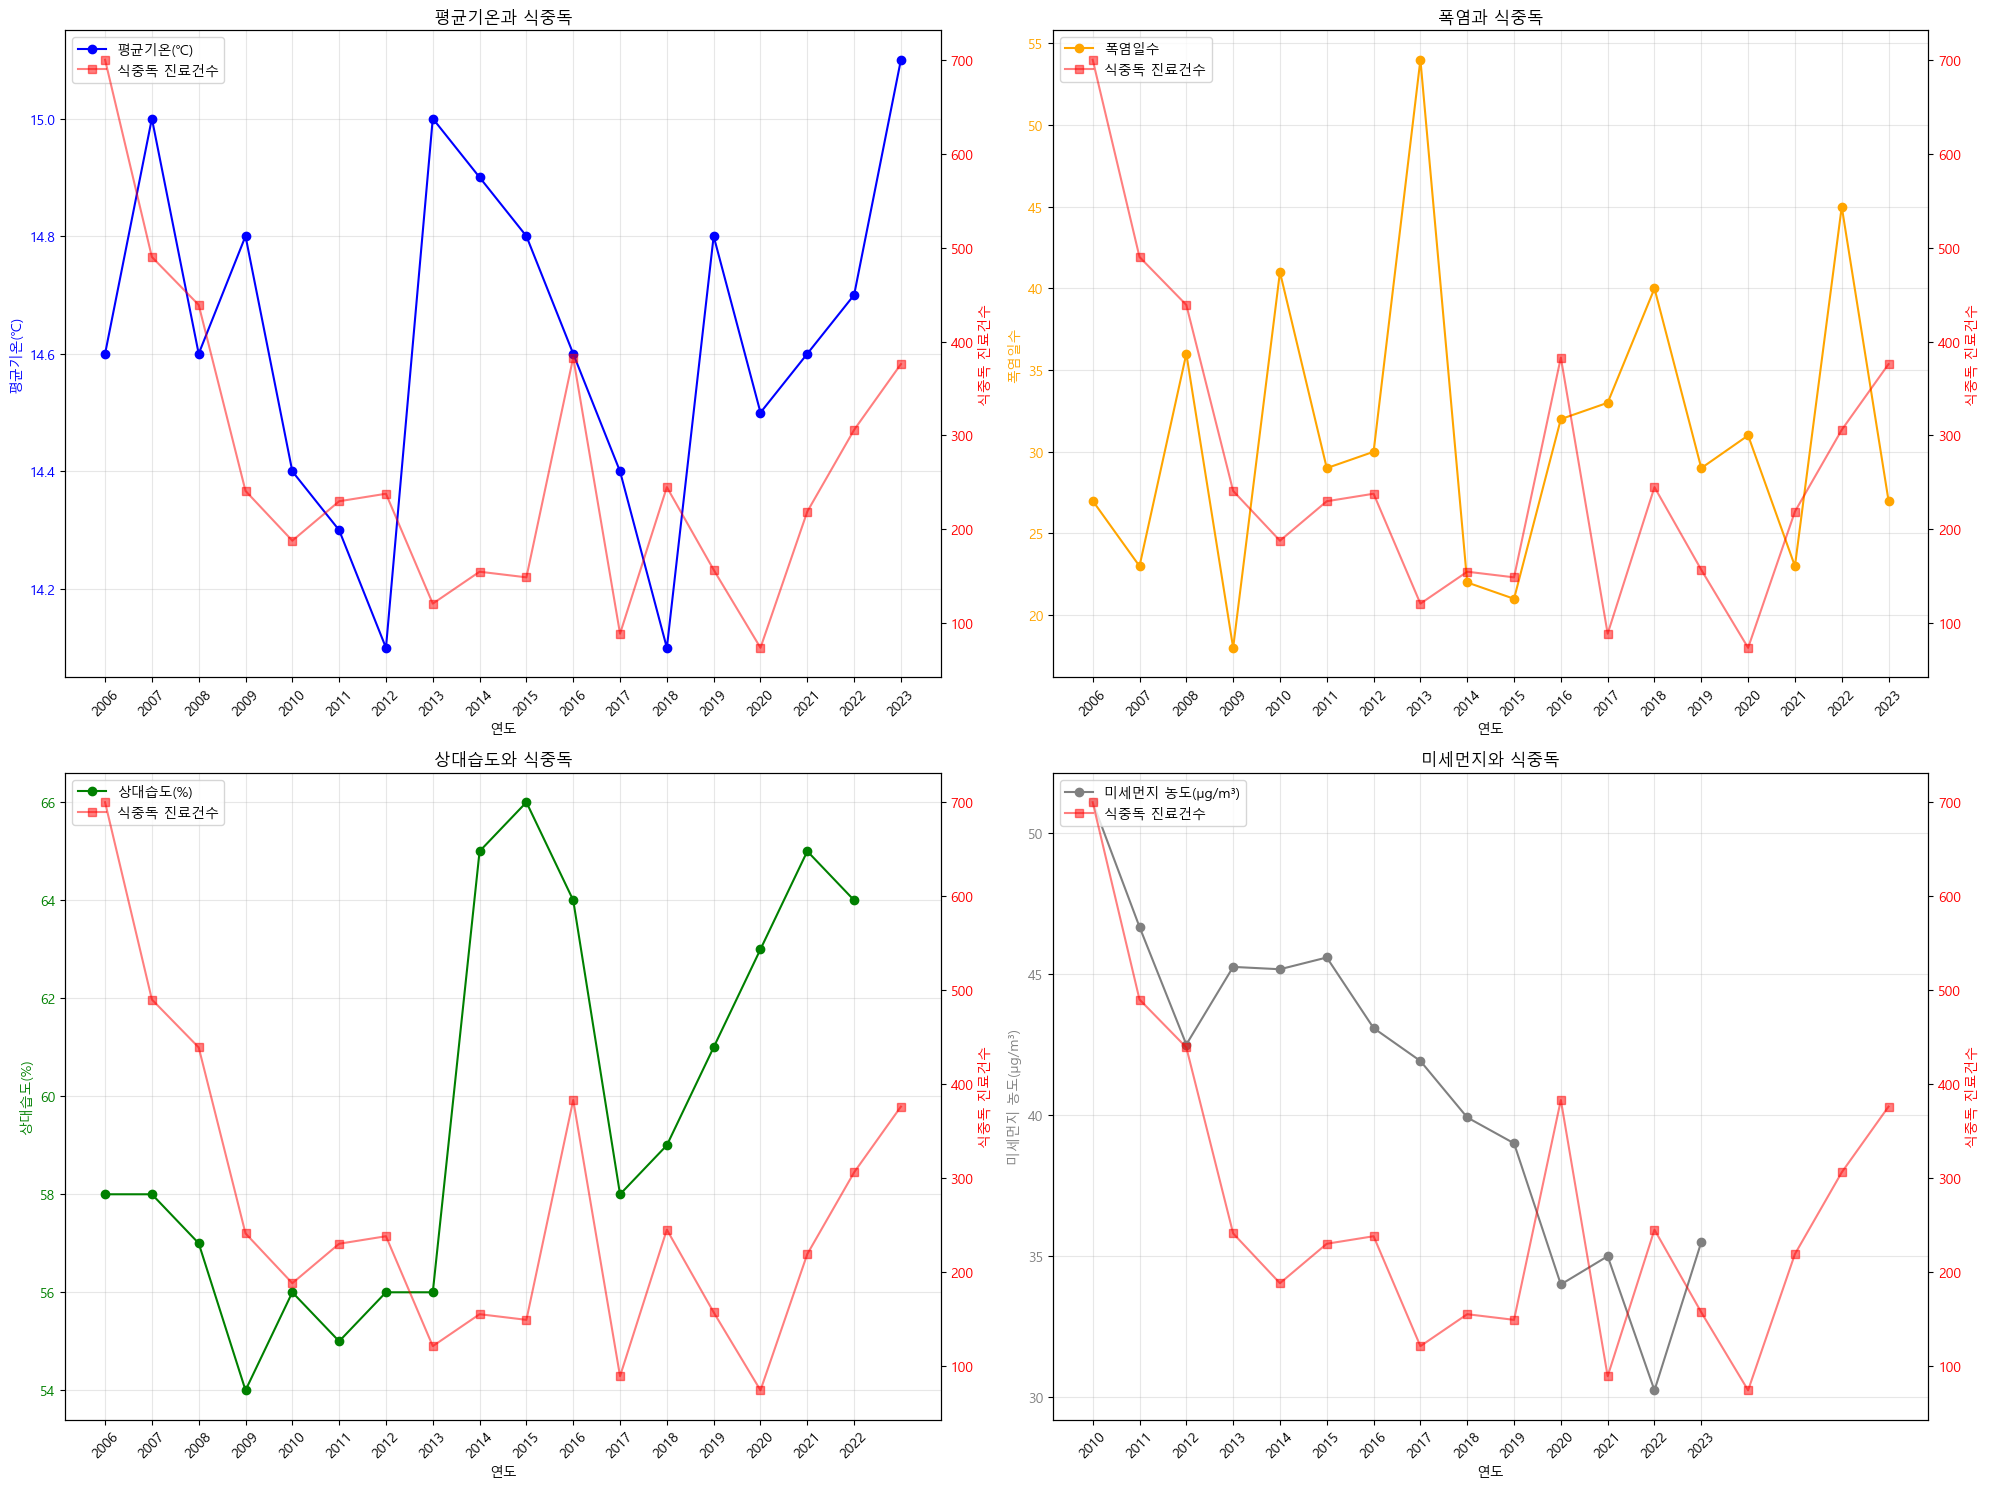

In [343]:
# 식중독과의 관계
ut.plot_quad_with_disease(
    [daegu_temper, daegu_hot, daegu_hum, PM_yearly],  # 환경 데이터 리스트
    Food_Poisoning,  # 질병 데이터
    ["평균기온과 식중독", "폭염과 식중독", 
     "상대습도와 식중독", "미세먼지와 식중독"],  # 제목 리스트
    ["평균기온(℃)", "폭염일수", 
     "상대습도(%)", "미세먼지 농도(μg/m³)"],  # 환경 데이터 레이블
    "식중독 진료건수",  # 질병 데이터 레이블
    ['blue', 'orange', 'green', 'gray']  # 색상 리스트
)

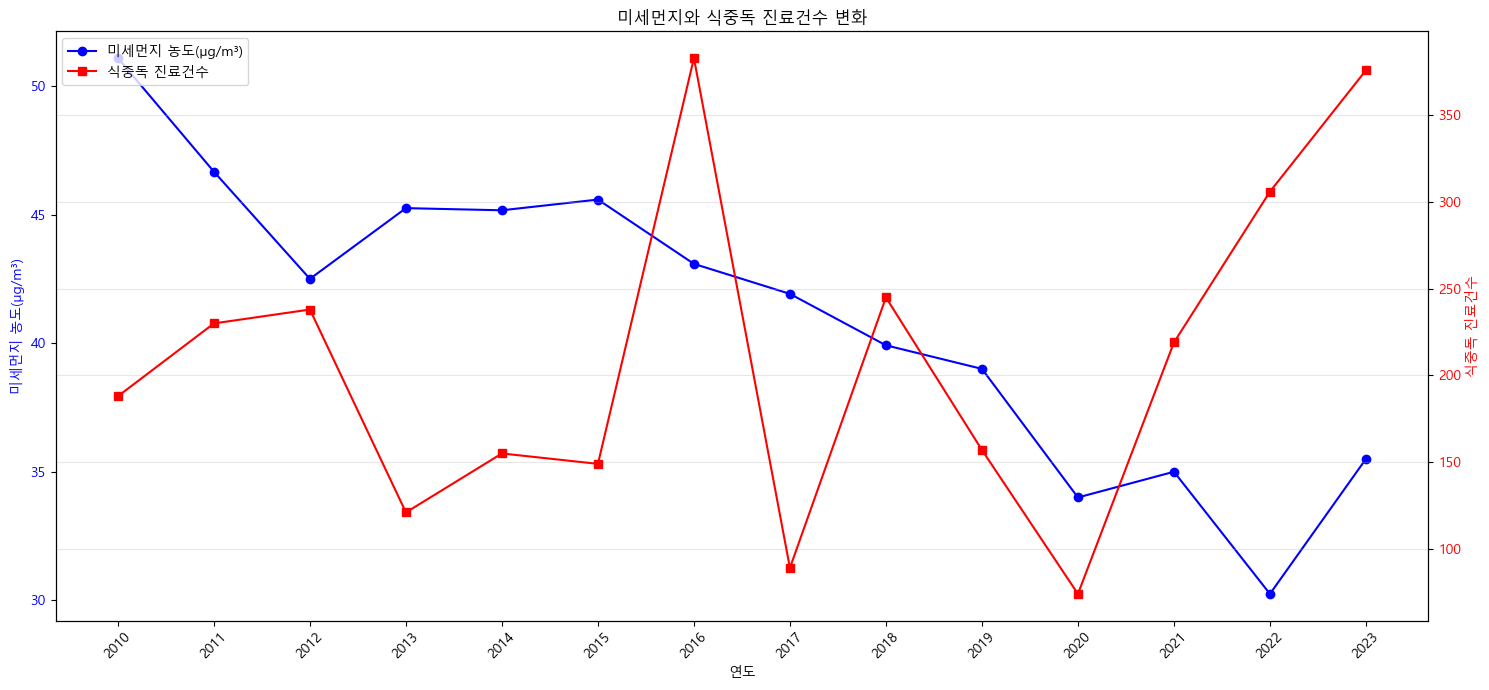

In [344]:
Food_Poisoning10 = Food_Poisoning[Food_Poisoning['년'] >= '2010년'].copy() 

ut.plot_dual_data(
    PM_yearly,  # 미세먼지 데이터 (년, 평균기온)
    Food_Poisoning10,    # 식중독 데이터 (년, 진료건수)
    "미세먼지와 식중독 진료건수 변화",
    "미세먼지 농도(μg/m³)",
    "식중독 진료건수"
)